In [183]:
import torch,torchvision
from torch import nn,optim
from torch.autograd import Variable as Variable
import pandas as pd
import numpy as np

from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [24]:
train=pd.read_csv("train.csv",dtype=np.float32)
test=pd.read_csv("test.csv",dtype=np.float32)

In [25]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,252.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


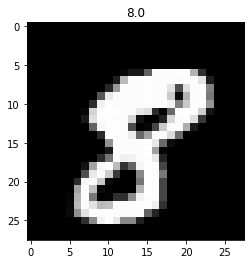

In [216]:
train = pd.read_csv("train.csv",dtype = np.float32)
test_kaggle=pd.read_csv("test.csv",dtype = np.float32)

batchsize = 150
num_epochs = 29

labels = train.label.values
train= train.loc[:,train.columns != "label"].values/255 

X_train, X_test, Y_train, Y_test= train_test_split(train,labels,test_size = 0.1,random_state = 0) 
train_tensor= torch.from_numpy(X_train)
labels_train_tensor=torch.from_numpy(Y_train).type(torch.LongTensor) 
test_tensor= torch.from_numpy(X_test)
labels_test_tensor=torch.from_numpy(Y_test).type(torch.LongTensor)

train_tensor_dataset = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test_tensor_dataset = torch.utils.data.TensorDataset(featuresTest,targetsTest)

train_dataloader = DataLoader(train_tensor_dataset, batch_size = batchsize, shuffle = False)
test_dataloader = DataLoader(test_tensor_dataset, batch_size = batchsize, shuffle = False)


plt.imshow(train[10].reshape(28,28),cmap="gray")
plt.title(str(labels[10]))

plt.show()

In [221]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression,self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
       
    def forward(self, x):
        out = self.linear(x)
        return out


input_dim = 784 
output_dim = 10  

model =  LogisticRegression(input_dim, output_dim)

 
error = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
iteration_num=0
loss_list = []
iteration = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dataloader):
        
        
        train_images = Variable(images.view(-1, 784))
        labels = Variable(labels)
        optimizer.zero_grad()
        op = model(train_images)
        loss = error(op, labels)
        loss.backward()
        optimizer.step()
        iteration_num+=1
        if iteration_num % 50 == 0:    
            correct = 0
            total = 0
            for images, labels in test_dataloader: 
                test_images= Variable(images.view(-1,784))
                outputs = model(test_images)
                value,predicted = torch.max(outputs.data, 1)
                correct += (predicted == labels).sum()
                total += len(labels)
            
            accuracy = 100 * correct / float(total)
            loss_list.append(loss.data)
            iteration.append(iteration_num)
        if iteration_num%100 == 0:
            print("Epoch:",epoch+1,"Batch number:",i+1,"Loss:",loss.data,"Accuracy:",accuracy,"%")

Epoch: 1 Batch number: 100 Loss: tensor(2.2145) Accuracy: tensor(29.7976) %
Epoch: 1 Batch number: 200 Loss: tensor(2.1208) Accuracy: tensor(46.3571) %
Epoch: 2 Batch number: 76 Loss: tensor(2.0440) Accuracy: tensor(57.3333) %
Epoch: 2 Batch number: 176 Loss: tensor(1.9689) Accuracy: tensor(63.2976) %
Epoch: 3 Batch number: 52 Loss: tensor(1.8653) Accuracy: tensor(68.2857) %
Epoch: 3 Batch number: 152 Loss: tensor(1.8254) Accuracy: tensor(71.3571) %
Epoch: 4 Batch number: 28 Loss: tensor(1.7337) Accuracy: tensor(73.6190) %
Epoch: 4 Batch number: 128 Loss: tensor(1.6137) Accuracy: tensor(75.2976) %
Epoch: 5 Batch number: 4 Loss: tensor(1.5904) Accuracy: tensor(76.3690) %
Epoch: 5 Batch number: 104 Loss: tensor(1.5029) Accuracy: tensor(77.0714) %
Epoch: 5 Batch number: 204 Loss: tensor(1.5368) Accuracy: tensor(77.7857) %
Epoch: 6 Batch number: 80 Loss: tensor(1.5064) Accuracy: tensor(78.3929) %
Epoch: 6 Batch number: 180 Loss: tensor(1.4574) Accuracy: tensor(78.8214) %
Epoch: 7 Batch num

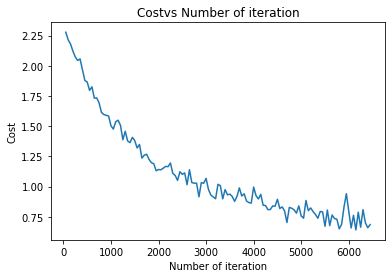

In [222]:
plt.plot(iteration,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Cost")
plt.title("Costvs Number of iteration")
plt.show()

In [223]:
train_data = torchvision.datasets.MNIST('mnist_data',train=True,download=True,transform=torchvision.transforms.ToTensor())
val_data = torchvision.datasets.MNIST('mnist_data',train=False,download=True,transform=torchvision.transforms.ToTensor())

train_dataloader = torch.utils.data.DataLoader(train_data,batch_size =batchsize)
val_dataloader = torch.utils.data.DataLoader(val_data,batch_size =batchsize)

In [228]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.cnn1 = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3)
    self.cnn2 = nn.Conv2d(in_channels=3,out_channels=2,kernel_size=5)
    self.linear = nn.Linear(968,10)
    self.relu = nn.ReLU()
  
  def forward(self,input):
    n = input.size(0)
    x = self.relu(self.cnn1(input))
    x = self.relu(self.cnn2(x))
    x = x.view(n,-1)
    x = self.linear(x)
    return x



    



In [229]:
mycnn = CNN().cuda()
cce = nn.CrossEntropyLoss()
optimizer = optim.Adam(mycnn.parameters(),lr = learning_rate)

def accuracy(model,data):
  
  total = 0
  correct = 0
  for i,(images,labels) in enumerate(data):
    images = var(images.cuda())
    predict= model(images)
    value,pred = torch.max(predict,1)
    pred = pred.data.cpu()
    total += predict.size(0)
    correct += (pred == labels).sum()
  return (correct*100.0)/total

for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_dataloader):
    images = var(images.cuda())
    labels = var(labels.cuda())
    optimizer.zero_grad()
    pred = mycnn(images)
    loss = cce(pred,labels)
    loss.backward()
    optimizer.step()
    if (i+1) % 100 == 0:
      accuracy = float(validate(mycnn,val_dataloader))
      print('Epoch :',epoch+1,'Batch :',i+1,'Loss :',float(loss.data),'Accuracy :',accuracy,'%')

Epoch : 1 Batch : 100 Loss : 0.4022638201713562 Accuracy : 87.33000183105469 %
Epoch : 1 Batch : 200 Loss : 0.5926177501678467 Accuracy : 90.22000122070312 %
Epoch : 1 Batch : 300 Loss : 0.4215782582759857 Accuracy : 91.77999877929688 %
Epoch : 1 Batch : 400 Loss : 0.24952229857444763 Accuracy : 91.4800033569336 %
Epoch : 2 Batch : 100 Loss : 0.21138368546962738 Accuracy : 92.72000122070312 %
Epoch : 2 Batch : 200 Loss : 0.3608517348766327 Accuracy : 93.66999816894531 %
Epoch : 2 Batch : 300 Loss : 0.31887882947921753 Accuracy : 93.91999816894531 %
Epoch : 2 Batch : 400 Loss : 0.20290181040763855 Accuracy : 94.04000091552734 %
Epoch : 3 Batch : 100 Loss : 0.1656174510717392 Accuracy : 94.70999908447266 %
Epoch : 3 Batch : 200 Loss : 0.24694348871707916 Accuracy : 95.20999908447266 %
Epoch : 3 Batch : 300 Loss : 0.2809584140777588 Accuracy : 94.94000244140625 %
Epoch : 3 Batch : 400 Loss : 0.1724320501089096 Accuracy : 95.23999786376953 %
Epoch : 4 Batch : 100 Loss : 0.14396964013576508

In [230]:

test_kaggle=test_kaggle.values
test_kaggle=torch.from_numpy(test_kaggle)

print(test_kaggle.shape)

torch.Size([28000, 784])


In [231]:
digit=[]
for l in range(len(test_kaggle)):
  img=test_kaggle[l]
  img=img.unsqueeze(0)
  prediction=model(img)
  index=torch.max(prediction,1)[1]
  digit.append(index)

In [232]:
labels=[]
for i in range(28000):
  labels.append(digit[i].numpy()[0])




In [240]:
print(labels)

[2, 0, 9, 7, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 8, 5, 7, 4, 2, 7, 7, 7, 7, 5, 4, 2, 6, 2, 9, 5, 5, 6, 7, 7, 4, 9, 8, 7, 8, 8, 6, 1, 6, 8, 8, 3, 8, 2, 1, 2, 9, 0, 4, 1, 7, 0, 0, 0, 1, 4, 0, 1, 6, 5, 8, 8, 2, 5, 3, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0, 6, 6, 8, 9, 3, 8, 7, 4, 0, 3, 8, 0, 7, 8, 0, 5, 0, 9, 0, 0, 6, 2, 1, 2, 1, 1, 5, 3, 3, 7, 2, 8, 6, 3, 8, 7, 8, 4, 3, 5, 6, 0, 0, 0, 3, 1, 3, 6, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 4, 3, 5, 6, 5, 8, 7, 5, 7, 8, 3, 0, 4, 5, 1, 8, 7, 6, 5, 0, 2, 7, 9, 6, 1, 3, 7, 4, 1, 2, 4, 8, 5, 2, 4, 9, 2, 1, 6, 0, 6, 1, 4, 2, 6, 0, 9, 7, 6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 7, 2, 1, 6, 3, 4, 2, 3, 1, 0, 2, 8, 9, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 8, 8, 6, 8, 6, 2, 3, 5, 5, 9, 8, 3, 8, 9, 7, 1, 3, 8, 4, 5, 1, 4, 3, 2, 3, 8, 5, 7, 0, 6, 8, 6, 1, 6, 0, 6, 3, 8, 9, 1, 5, 8, 4, 0, 9, 6, 0, 5, 3, 7, 1, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6, 9, 8, 2, 6, 2, 7, 1, 4, 5, 8, 6, 9, 0, 0, 3, 8, 4, 1, 8, 4, 1, 1, 9, 8, 4, 5, 1, 3, 7, 6, 3, 1, 

In [246]:
id=[i for i in range(1,28001)]
df= pd.DataFrame({'ImageId':id,'Label':labels})
df.to_csv("submission.csv", index =False)
print("Loaded successfully")



Loaded successfully


CNN has better accuracy than Logistic Regression

CNN has accuracy of 96.74% and Logistic Regression has 84.82%